# EDA on 'BU_trained Data.xlsx'

This is the notebook used to document the EDA process, the hypothesis generation and requisite visualizations. For the current project, I shall be using Python for all tasks. 


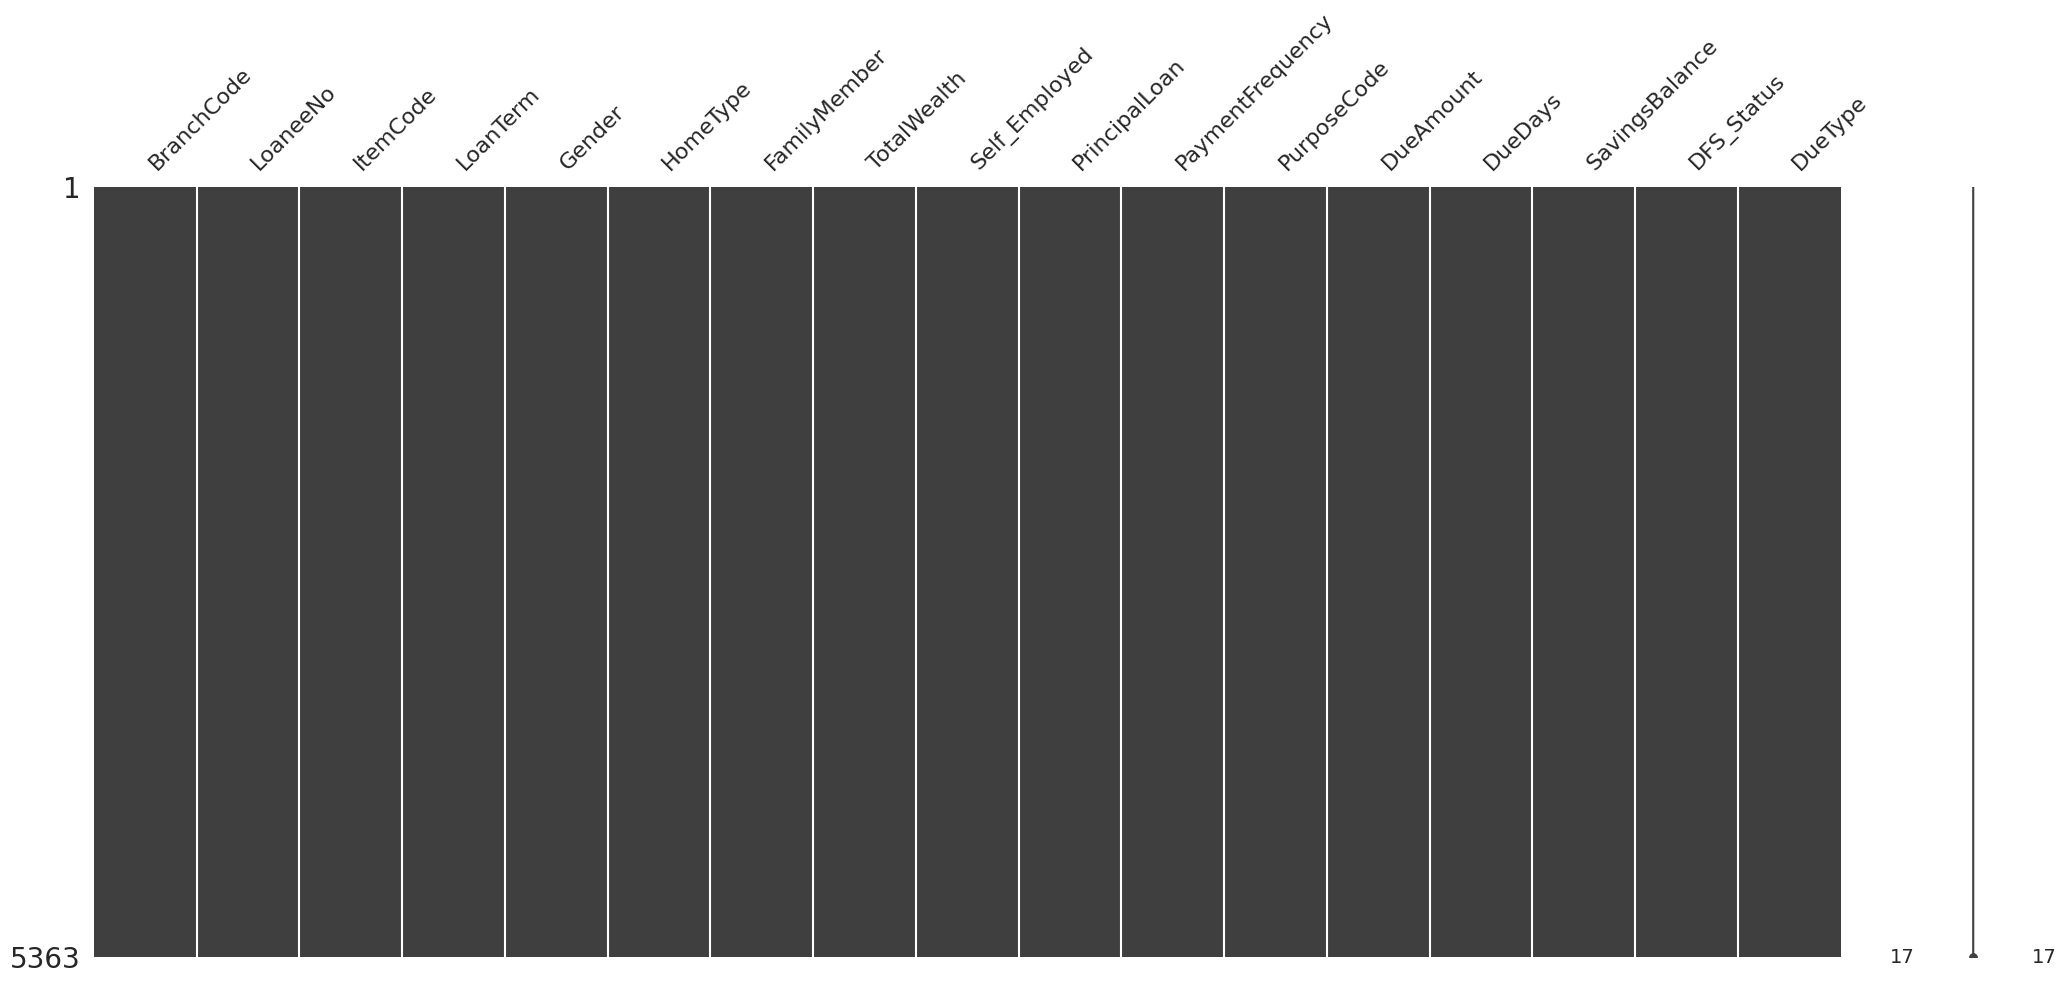

In [12]:
# Importing the necessary libraries
import pandas as pd  # pandas is a software library for data manipulation and analysis
import missingno as msno  # missingno provides a small toolset of flexible and easy-to-use missing data visualizations

# Loading the dataset from an Excel file
df = pd.read_excel('BU_trained Data.xlsx')

# Visualizing the completeness of the dataset using missingno's matrix function
# This function provides a heatmap-like overview of the missing values in the dataset
msno.matrix(df)

# Removing all rows in the dataframe that contain at least one missing value
# This is a part of the data cleaning process
df = df.dropna()


In [13]:
# Taking an initial look at the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BranchCode        5363 non-null   int64  
 1   LoaneeNo          5363 non-null   int64  
 2   ItemCode          5363 non-null   float64
 3   LoanTerm          5363 non-null   int64  
 4   Gender            5363 non-null   object 
 5   HomeType          5363 non-null   object 
 6   FamilyMember      5363 non-null   int64  
 7   TotalWealth       5363 non-null   int64  
 8   Self_Employed     5363 non-null   object 
 9   PrincipalLoan     5363 non-null   int64  
 10  PaymentFrequency  5363 non-null   object 
 11  PurposeCode       5363 non-null   float64
 12  DueAmount         5363 non-null   int64  
 13  DueDays           5363 non-null   int64  
 14  SavingsBalance    5363 non-null   int64  
 15  DFS_Status        5363 non-null   object 
 16  DueType           5363 non-null   object 


In [14]:
print(df.head())

   BranchCode   LoaneeNo  ItemCode  LoanTerm  Gender HomeType  FamilyMember  \
0          39   39103972      2.02         1  Female       TN             6   
1          39   39110777      2.05         1  Female       SB             2   
2         400  400108047      3.03         3  Female       TN             4   
3          89    8916634      1.03         1  Female       TN             3   
4         400  400104472      3.01         3  Female       MU             4   

   TotalWealth Self_Employed  PrincipalLoan PaymentFrequency  PurposeCode  \
0       200000            HW         150000                W         1.17   
1       200000            HW         150000                M         1.17   
2       200000            HW          70000                M        10.63   
3       200000            HW          60000                M         1.77   
4       200000            HW          50000                W         1.17   

   DueAmount  DueDays  SavingsBalance DFS_Status   DueType  
0

Number of unique branches: 3
Number of unique loanees in each branch:
BranchCode
39     1685
89     1583
400    1710
Name: LoaneeNo, dtype: int64


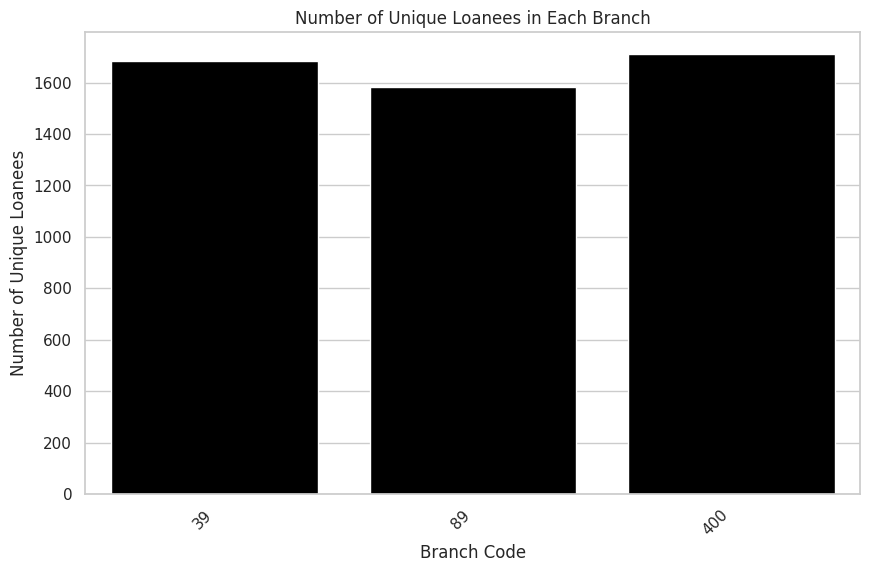

In [15]:
# Importing the necessary libraries for data visualization
import seaborn as sns  # seaborn is a Python data visualization library based on matplotlib
import matplotlib.pyplot as plt  # matplotlib.pyplot provides a MATLAB-like interface for making plots and charts

# Calculating the number of unique branches in the dataset
num_unique_branches = len(df['BranchCode'].unique())
print("Number of unique branches:", num_unique_branches)  # Printing the number of unique branches

# Calculating the number of unique loanees in each branch
num_unique_loanees = df.groupby('BranchCode')['LoaneeNo'].nunique()
print("Number of unique loanees in each branch:")  # Printing the number of unique loanees in each branch
print(num_unique_loanees)

# Setting the seaborn style to whitegrid and the color palette to Grayscale
# This will be applied to all subsequent plots
sns.set(style="whitegrid", palette="Greys")

# Creating a new figure for the bar chart
plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating a bar chart with seaborn
# The x-axis represents the branch codes and the y-axis represents the number of unique loanees
ax = sns.barplot(x=num_unique_loanees.index, y=num_unique_loanees.values, color='black', legend=False)

# Setting the labels and title for the bar chart
ax.set(xlabel='Branch Code', ylabel='Number of Unique Loanees', title='Number of Unique Loanees in Each Branch')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


Average total wealth for the loanees of each branch:
BranchCode
39     196033.369214
89     178278.409091
400    178659.025788
Name: TotalWealth, dtype: float64


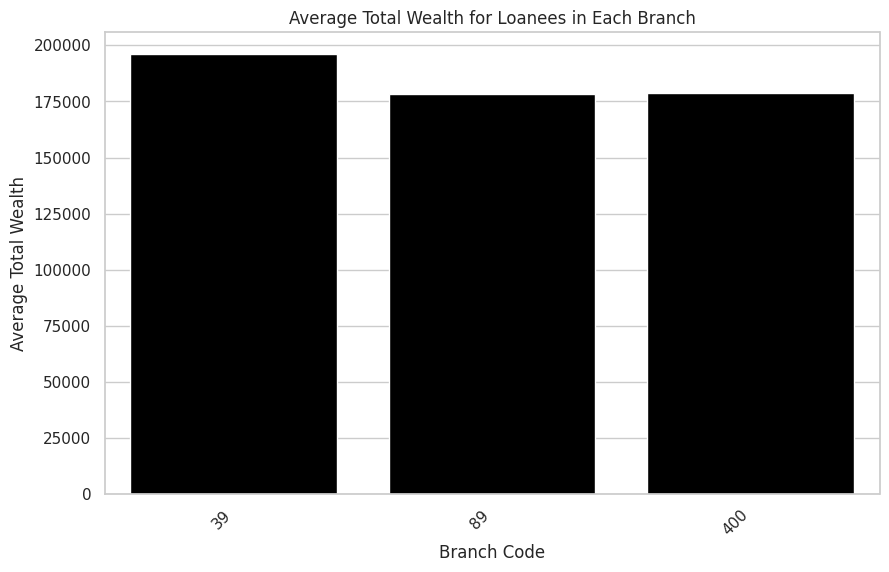

In [16]:
# Calculating the average total wealth for the loanees of each branch
average_total_wealth = df.groupby('BranchCode')['TotalWealth'].mean()
print("Average total wealth for the loanees of each branch:")  # Printing the average total wealth for the loanees of each branch
print(average_total_wealth)

# Setting the seaborn style to whitegrid and the color palette to Grayscale
# This will be applied to all subsequent plots
sns.set(style="whitegrid", palette="Greys")

# Creating a new figure for the bar chart
plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating a bar chart with seaborn
# The x-axis represents the branch codes and the y-axis represents the average total wealth
ax = sns.barplot(x=average_total_wealth.index, y=average_total_wealth.values, color='black', legend=False)

# Setting the labels and title for the bar chart
ax.set(xlabel='Branch Code', ylabel='Average Total Wealth', title='Average Total Wealth for Loanees in Each Branch')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


Average SavingsBalance for the loanees of each branch:
BranchCode
39     6783.763724
89     7022.851136
400    2373.793123
Name: SavingsBalance, dtype: float64


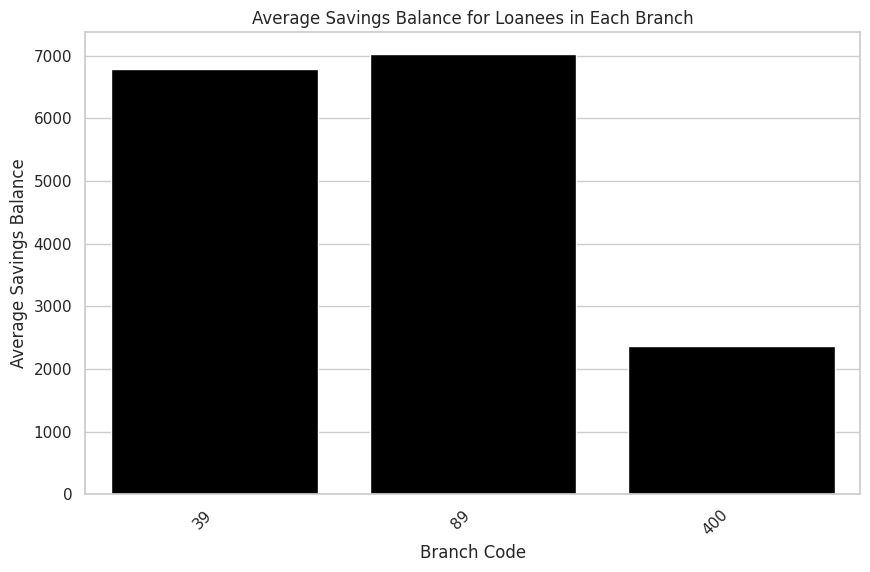

In [17]:
# Calculating the average SavingsBalance for the loanees of each branch
average_savings_balance = df.groupby('BranchCode')['SavingsBalance'].mean()
print("Average SavingsBalance for the loanees of each branch:")  # Printing the average SavingsBalance for the loanees of each branch
print(average_savings_balance)

# Setting the seaborn style to whitegrid and the color palette to Grayscale
# This will be applied to all subsequent plots
sns.set(style="whitegrid", palette="Greys")

# Creating a new figure for the bar chart
plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating a bar chart with seaborn
# The x-axis represents the branch codes and the y-axis represents the average SavingsBalance
ax = sns.barplot(x=average_savings_balance.index, y=average_savings_balance.values, color='black', legend=False)

# Setting the labels and title for the bar chart
ax.set(xlabel='Branch Code', ylabel='Average Savings Balance', title='Average Savings Balance for Loanees in Each Branch')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.show()


This is interesting, because if the idea of the savings account balance is negatively correlated with risky loans, the proportion of regular loans compared to loans with high risk of default (watchful, substandard, doubtful) would be lower for branch ```400``` compared to ```89``` and ```39```. Let's take a look.

<Figure size 1500x800 with 0 Axes>

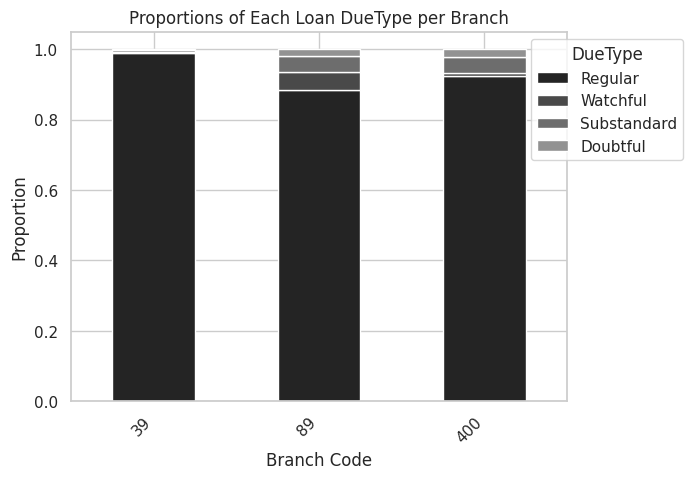

In [18]:
# Define the desired order of the 'DueType' categories
order = ['Regular', 'Watchful', 'Substandard', 'Doubtful']

# Calculate the proportions of each loan 'DueType' per branch
# This is done by grouping the data by 'BranchCode' and 'DueType', counting the size of each group,
# unstacking the resulting Series into a DataFrame (filling missing values with 0),
# and then dividing each row by its sum to get proportions
due_type_proportions = df.groupby(['BranchCode', 'DueType']).size().unstack(fill_value=0)
due_type_proportions = due_type_proportions.div(due_type_proportions.sum(axis=1), axis=0)

# Rearrange the columns of the DataFrame according to the defined order
due_type_proportions = due_type_proportions[order]

# Set seaborn style to whitegrid and set the color palette to grayscale
# This will be applied to all subsequent plots
sns.set(style="whitegrid", palette="gray")

# Create a new figure for the stacked bar chart
plt.figure(figsize=(15, 8))  # Increase the figure size

# Create a stacked bar chart for loan 'DueType' proportions with seaborn
# The x-axis represents the branch codes and the y-axis represents the proportions
ax = due_type_proportions.plot(kind='bar', stacked=True)

# Setting the labels and title for the bar chart
ax.set(xlabel='Branch Code', ylabel='Proportion', title='Proportions of Each Loan DueType per Branch')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting the position of the legend and setting its title
plt.legend(title='DueType', loc='upper right', bbox_to_anchor=(1.25, 1))

# Displaying the plot
plt.show()


But with this visualization, we can see that this is not the case. The branch with the highest savings balance average is the one with the lowest proportion of regular loans. This is not conclusive evidence that there is no significant relationship between savings balance and default risk, but it serves as an indicator.

Rename ```Self_Employed``` to ```Job```.

Now, we can take a look carefully at each variables of interest.
- ```LoanTerm``` and ```Gender``` distributions.
- ```HomeType``` and ```FamilyMembers``` distributions.
- ```DFS_Status``` and ```DueType``` distributions.
- ```PrincipalLoan``` and ```TotalWealth``` descriptive statistics.




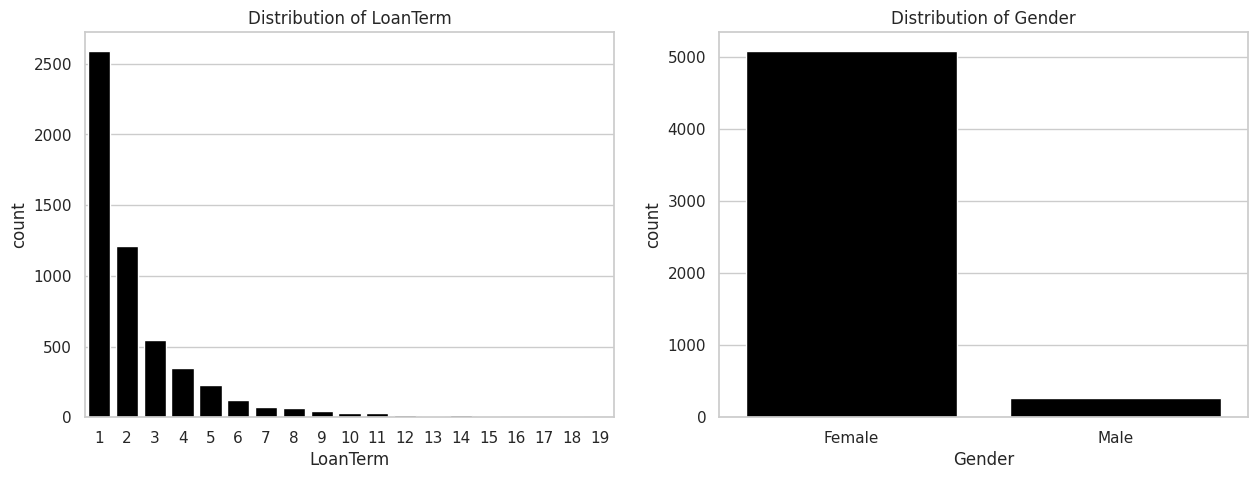

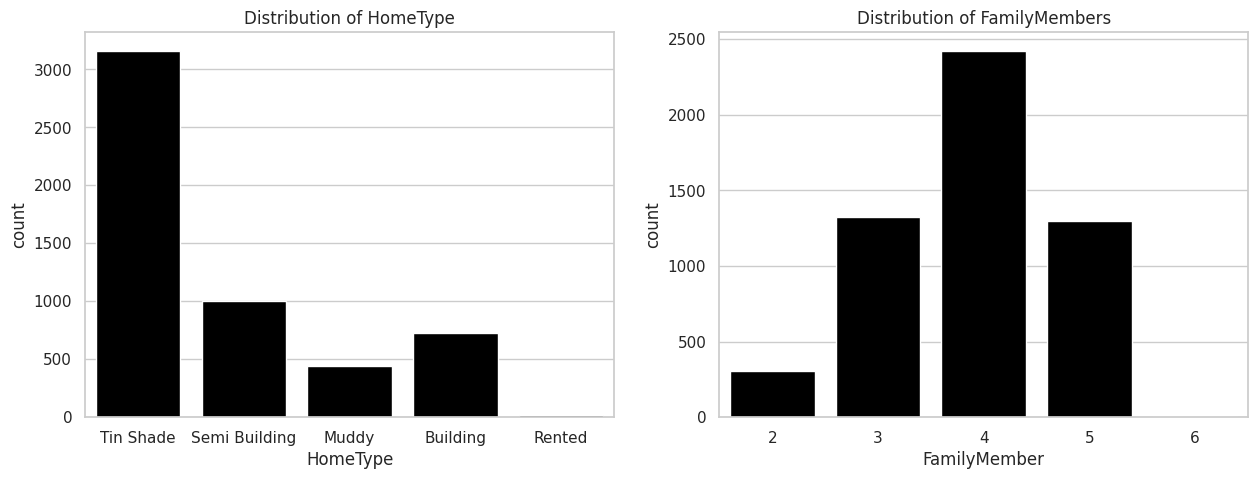

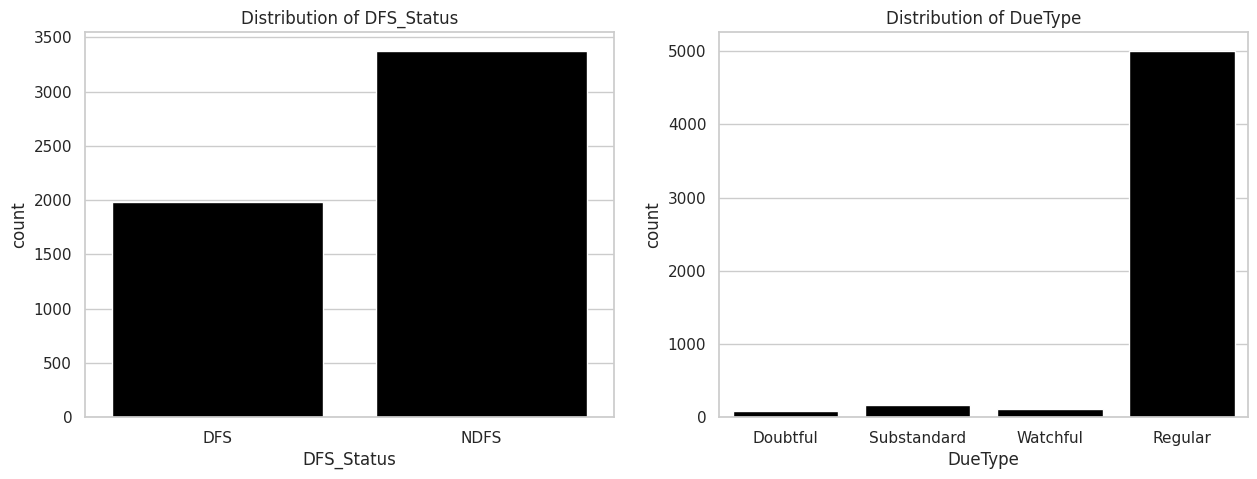

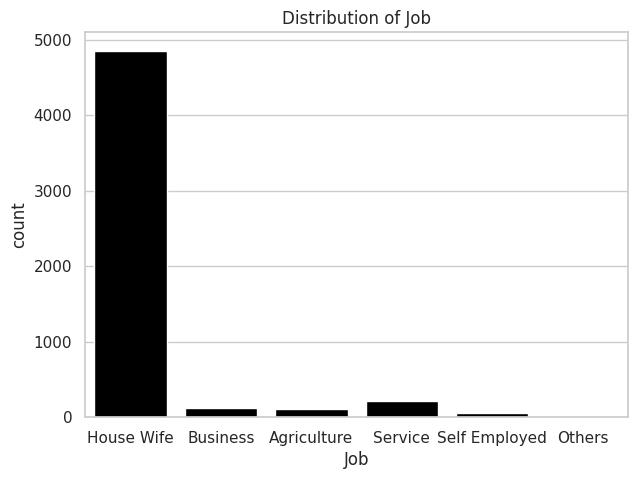

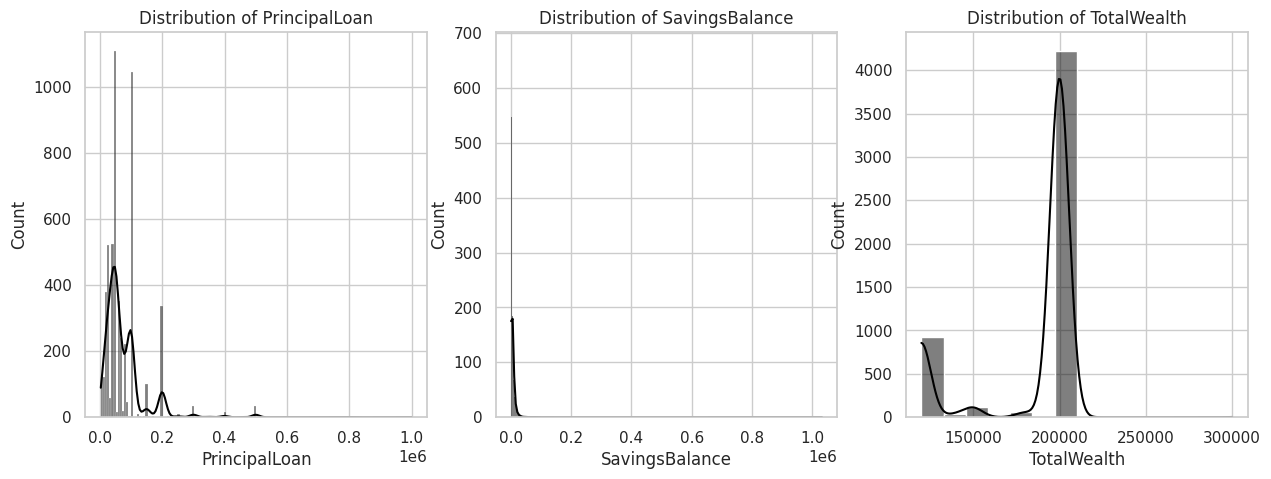

Descriptive Statistics for Principal Loan:
count       5363.000000
mean       74713.810740
std        67229.640147
min         3176.000000
25%        40000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: PrincipalLoan, dtype: float64

Descriptive Statistics for Total Wealth:
count      5363.000000
mean     184553.421592
std       30888.875212
min      120000.000000
25%      200000.000000
50%      200000.000000
75%      200000.000000
max      300000.000000
Name: TotalWealth, dtype: float64


In [19]:
# Importing the necessary libraries for data visualization
import seaborn as sns  # seaborn is a Python data visualization library based on matplotlib
import matplotlib.pyplot as plt  # matplotlib.pyplot provides a MATLAB-like interface for making plots and charts

# Renaming the 'Self_Employed' column to 'Job' in the dataframe
df.rename(columns={'Self_Employed': 'Job'}, inplace=True)

# Setting the seaborn style to whitegrid and the color palette to Greys
# This will be applied to all subsequent plots
sns.set(style="whitegrid", palette=sns.color_palette("Greys"))

# Creating a new figure for the count plots
plt.figure(figsize=(15, 5))  # Setting the figure size

# Creating a count plot for 'LoanTerm' with seaborn
plt.subplot(1, 2, 1)
sns.countplot(x='LoanTerm', data=df, color='black', legend=False)
plt.title('Distribution of LoanTerm')

# Creating a count plot for 'Gender' with seaborn
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df, color='black', legend=False)
plt.title('Distribution of Gender')

# Displaying the plots
plt.show()

# Creating a new figure for the count plots
plt.figure(figsize=(15, 5))  # Setting the figure size

# Creating a dictionary to map the codes in 'HomeType' to their full forms
home_type_dict = {
    'BU': 'Building',
    'MU': 'Muddy',
    'RE': 'Rented',
    'SB': 'Semi Building',
    'TN': 'Tin Shade'
}
# Applying the mapping to the 'HomeType' column in the dataframe
df['HomeType'] = df['HomeType'].map(home_type_dict)

# Creating a count plot for 'HomeType' with seaborn
plt.subplot(1, 2, 1)
sns.countplot(x='HomeType', data=df, color='black', legend=False)
plt.title('Distribution of HomeType')

# Creating a count plot for 'FamilyMember' with seaborn
plt.subplot(1, 2, 2)
sns.countplot(x='FamilyMember', data=df, color='black', legend=False)
plt.title('Distribution of FamilyMembers')

# Displaying the plots
plt.show()

# Creating a new figure for the count plots
plt.figure(figsize=(15, 5))  # Setting the figure size

# Creating a count plot for 'DFS_Status' with seaborn
plt.subplot(1, 2, 1)
sns.countplot(x='DFS_Status', data=df, color='black', legend=False)
plt.title('Distribution of DFS_Status')

# Creating a count plot for 'DueType' with seaborn
plt.subplot(1, 2, 2)
sns.countplot(x='DueType', data=df, color='black', legend=False)
plt.title('Distribution of DueType')

# Displaying the plots
plt.show()

# Creating a dictionary to map the codes in 'Job' to their full forms
job_dict = {
    'SM': 'Self Employed',
    'SE': 'Service',
    'BU': 'Business',
    'HW': 'House Wife',
    'AG': 'Agriculture',
    'OH': 'Others'
}
# Applying the mapping to the 'Job' column in the dataframe
df['Job'] = df['Job'].map(job_dict)

# Creating a new figure for the count plot
plt.figure(figsize=(7, 5))  # Setting the figure size

# Creating a count plot for 'Job' with seaborn
sns.countplot(x='Job', data=df, color='black', legend=False)
plt.title('Distribution of Job')

# Displaying the plot
plt.show()

# Creating a new figure for the histograms
plt.figure(figsize=(15, 5))  # Setting the figure size

# Creating a histogram for 'PrincipalLoan' with seaborn
plt.subplot(1, 3, 1)
sns.histplot(df['PrincipalLoan'], kde=True, color='black')
plt.title('Distribution of PrincipalLoan')

# Creating a histogram for 'SavingsBalance' with seaborn
plt.subplot(1, 3, 2)
sns.histplot(df['SavingsBalance'], kde=True, color='black')
plt.title('Distribution of SavingsBalance')

# Creating a histogram for 'TotalWealth' with seaborn
plt.subplot(1, 3, 3)
sns.histplot(df['TotalWealth'], kde=True, color='black')
plt.title('Distribution of TotalWealth')

# Displaying the plots
plt.show()

# Displaying descriptive statistics for 'PrincipalLoan' and 'TotalWealth'
print("Descriptive Statistics for Principal Loan:")
print(df['PrincipalLoan'].describe())

print("\nDescriptive Statistics for Total Wealth:")
print(df['TotalWealth'].describe())


Look at hometype, job, and number of family members as risk factors.


But first, let's do the logistic regression between 'SavingsBalance' and 'DueType'. In order to do that, we create a new column called 'binDueType' and store 0 if it is regular, else, store 1.


In [20]:
# Creating a new column 'binDueType' in the dataframe
# This column is a binary representation of the 'DueType' column,
# where 'Regular' is represented as 0 and all other types are represented as 1
df['binDueType'] = df['DueType'].apply(lambda x: 0 if x == 'Regular' else 1)


In [21]:
# Importing the statsmodels library for statistical modeling
import statsmodels.api as sm

# Adding a constant column to the dataframe
# This is necessary for the logistic regression model as it allows for an intercept
df['intercept'] = 1

# Defining the independent variable (X) and the dependent variable (y)
# The independent variable is 'SavingsBalance' and the dependent variable is 'binDueType'
X = df[['intercept', 'SavingsBalance']]
y = df['binDueType']

# Fitting the logistic regression model
# The Logit function from the statsmodels library is used to create the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Printing the summary of the logistic regression model
# The summary provides detailed results for the logistic regression model, including the coefficients of the predictors, the standard errors, and the p-values
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.213565
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             binDueType   No. Observations:                 5363
Model:                          Logit   Df Residuals:                     5361
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.1271
Time:                        14:22:25   Log-Likelihood:                -1145.3
converged:                       True   LL-Null:                       -1312.2
Covariance Type:            nonrobust   LLR p-value:                 1.575e-74
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.4674      0.080    -18.400      0.000      -1.624      -1.311
SavingsBalance  

The logistic regression model is used to predict the binary outcome variable `binDueType` based on the predictor variable `SavingsBalance`.

1. **Intercept (-1.4674)**: This is the log-odds of `binDueType` being 1 (or the event happening) when `SavingsBalance` is 0. In other words, when `SavingsBalance` is 0, the log odds of `binDueType` being 1 is -1.4674. The negative sign indicates that the event is less likely to happen when `SavingsBalance` is 0.

2. **SavingsBalance (-0.0005)**: This is the change in log-odds of `binDueType` for a one-unit increase in `SavingsBalance`. In other words, for every one-unit increase in `SavingsBalance`, the log odds of `binDueType` being 1 decrease by 0.0005. The negative sign indicates that as `SavingsBalance` increases, `binDueType` is less likely to be 1.

3. **Pseudo R-squared (0.1271)**: This is a measure of the goodness of fit of the logistic regression model. A value of 0.1271 indicates that about 12.71% of the variability in `binDueType` can be explained by `SavingsBalance`.

4. **LLR p-value (1.575e-74)**: This is the p-value associated with the likelihood ratio test of the model. A very small p-value (close to 0) indicates that the model is significantly better than an empty model (i.e., a model with no predictors).

5. **Z-score (-12.651 for SavingsBalance)**: This is the test statistic for the hypothesis test that the coefficient of `SavingsBalance` is zero. A large absolute value of the z-score and a small p-value indicates that we can reject the null hypothesis that the coefficient is zero.

6. **Confidence Interval ([0.025      0.975])**: This is the range within which we can be confident that the true parameter lies, given the data. For `SavingsBalance`, we can be confident that the true parameter is between -0.001 and -0.000, given the data.

The logistic regression equation based on the given data can be written in LaTeX format as follows:

$$
\log\left(\frac{P(\text{{binDueType}}=1)}{1-P(\text{{binDueType}}=1)}\right) = -1.4674 - 0.0005 \times \text{{SavingsBalance}}
$$

Where:
- $P(\text{{binDueType}}=1)$ is the probability of `binDueType` being 1.
- $\text{{SavingsBalance}}$ is the predictor variable.


The null hypothesis ($H_0$) and the alternative hypothesis ($H_a$) can be written as follows:

- Null Hypothesis ($H_0$): There is no relationship between `SavingsBalance` and `binDueType`. In terms of the coefficient, this can be written as: $$H_0: \beta_{\text{{SavingsBalance}}} = 0$$

- Alternative Hypothesis ($H_a$): There is a relationship between `SavingsBalance` and `binDueType`. In terms of the coefficient, this can be written as: $$H_a: \beta_{\text{{SavingsBalance}}} \neq 0$$

Where:
- $\beta_{\text{{SavingsBalance}}}$ is the coefficient of `SavingsBalance` in the logistic regression model.

These hypotheses are tested using the z-score and the associated p-value. If the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis and conclude that there is evidence of a relationship between `SavingsBalance` and `binDueType`. In this case, the p-value is very small (close to 0), so we would reject the null hypothesis and conclude that `SavingsBalance` is a significant predictor of `binDueType`. 

In [22]:
# Importing the necessary libraries for model evaluation
from sklearn.metrics import classification_report  # classification_report is used to measure the quality of predictions from a classification algorithm
import numpy as np  # numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

# Predicting the probabilities using the fitted logistic regression model
y_pred_prob = logit_result.predict(X)

# Converting the predicted probabilities into binary outcomes
# If the predicted probability is greater than 0.5, the predicted outcome is 1; otherwise, it's 0
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Printing the precision of the model using the classification report
# The classification report displays the precision, recall, F1, and support scores for the model
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5006
           1       0.00      0.00      0.00       357

    accuracy                           0.93      5363
   macro avg       0.47      0.50      0.48      5363
weighted avg       0.87      0.93      0.90      5363



/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This indicates the imbalanced sampling issue is causing problems in predicting irregular loans. 

In [23]:
import statsmodels.api as sm
from sklearn.metrics import classification_report
import numpy as np
from imblearn.over_sampling import SMOTE

# Define the independent variable (X) and the dependent variable (y)
X = df[['SavingsBalance']]
y = df['binDueType']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Add a constant column to the dataframe
X_res['intercept'] = 1

# Fit the logistic regression model
logit_model = sm.Logit(y_res, X_res)
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())

# Predict the probabilities
y_pred_prob = logit_result.predict(X_res)

# Convert probabilities into binary outcomes
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Print the precision of the model
print(classification_report(y_res, y_pred))


Optimization terminated successfully.
         Current function value: 0.611298
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             binDueType   No. Observations:                10012
Model:                          Logit   Df Residuals:                    10010
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.1181
Time:                        14:22:25   Log-Likelihood:                -6120.3
converged:                       True   LL-Null:                       -6939.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
SavingsBalance    -0.0003   8.84e-06    -30.053      0.000      -0.000      -0.000
intercept        

Now, we refresh the dataset, and perform an analysis to see whether there is a significant difference in means using the Turkey pairwise comparison test.

In [24]:
df = pd.read_excel('BU_trained Data.xlsx')

# Import necessary libraries
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform pairwise comparison and print the result
print(pairwise_tukeyhsd(df['SavingsBalance'], df['DueType']))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1      group2    meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------
   Doubtful     Regular  5607.5077  0.127  -982.2759 12197.2913  False
   Doubtful Substandard   646.8072 0.9967 -7258.9423  8552.5566  False
   Doubtful    Watchful  2872.6425 0.8273 -5747.9215 11493.2065  False
    Regular Substandard -4960.7005 0.0248  -9480.095  -441.3061   True
    Regular    Watchful -2734.8652 0.6027 -8412.7324   2943.002  False
Substandard    Watchful  2225.8353 0.8551   -4937.53  9389.2006  False
----------------------------------------------------------------------


In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('SavingsBalance ~ C(DueType)', data=df).fit()

# Perform ANOVA and print the result
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)


                  sum_sq      df         F    PR(>F)
C(DueType)  7.024666e+09     3.0  4.578746  0.003312
Residual    2.740574e+12  5359.0       NaN       NaN


In [26]:
print(df)

      BranchCode   LoaneeNo  ItemCode  LoanTerm  Gender HomeType  \
0             39   39103972      2.02         1  Female       TN   
1             39   39110777      2.05         1  Female       SB   
2            400  400108047      3.03         3  Female       TN   
3             89    8916634      1.03         1  Female       TN   
4            400  400104472      3.01         3  Female       MU   
...          ...        ...       ...       ...     ...      ...   
5358         400   40009904      3.01         1  Female       TN   
5359         400   40009887      3.03         1  Female       TN   
5360         400   40009442      3.03         1  Female       BU   
5361         400  400102384      1.01         6  Female       SB   
5362         400   40008956      3.01         1  Female       MU   

      FamilyMember  TotalWealth Self_Employed  PrincipalLoan PaymentFrequency  \
0                6       200000            HW         150000                W   
1                2   

In [27]:
df['binDueType'] = df['DueType'].apply(lambda x: 0 if x == 'Regular' else 1)


In [28]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame and it has columns 'HomeType' and 'DueType'
cross_tab = pd.crosstab(df['HomeType'], df['DueType'])

print("Cross-tabulation:")
print(cross_tab)

# Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)
print(f"Chi-square Test: chi2 = {chi2}, p = {p}")

# Import necessary libraries
import mord
from sklearn.preprocessing import LabelEncoder

# Define the order of categories for HomeType and DueType
# Define the mapping for HomeType and DueType
home_type_mapping = {'MU': 0, 'TN': 1, 'RE': 2, 'SB': 3, 'BU': 4}
due_type_mapping = {'Regular': 0, 'Watchful': 1, 'Substandard': 2, 'Doubtful': 3, 'BadLoan': 4}

# Create new columns HomeTypeO and DueTypeO
df['HomeTypeO'] = df['HomeType'].map(home_type_mapping)
df['DueTypeO'] = df['DueType'].map(due_type_mapping)

# Ordinal logistic regression
model = mord.LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation.
result = model.fit(df[['HomeTypeO']], df['DueTypeO'])

# Print the coefficient
print(f"\nCoefficient: {model.coef_}")





Cross-tabulation:
DueType   Doubtful  Regular  Substandard  Watchful
HomeType                                          
BU              19      675           21        16
MU               4      412           21         5
RE               0       20            0         0
SB              13      930           47        17
TN              43     2969           82        69
Chi-square Test: chi2 = 26.330811656849036, p = 0.009634160751870053

Coefficient: [0.09657445]




DueType Order:
0: Regular
1: Watchful
2: Substandard
3: Doubtful
4: BadLoan

HomeType Order:
0: MU - Muddy: Typically, muddy houses are considered to be of lower quality and less durable.
1: TN - Tin Shade: These might offer more protection than muddy houses but are still considered low in terms of quality.
2: RE - Rented: Renting a place can vary greatly in quality, but it suggests a lack of property ownership.
3: SB - Semi Building: This term is not clear without additional context, but it might suggest a partially completed or smaller building structure.
4: BU - Building: Indicates a complete building which is typically associated with higher economic capacity.

**Cross-Tabulation**

| HomeType | Regular | Watchful | Substandard | Doubtful | BadLoan |
|----------|---------|----------|-------------|----------|---------|
| MU       | 412     | 5        | 21          | 4        | -       |
| TN       | 2969    | 69       | 82          | 43       | -       |
| RE       | 20      | 0        | 0           | 0        | -       |
| SB       | 930     | 17       | 47          | 13       | -       |
| BU       | 675     | 16       | 21          | 19       | -       |


**Chi-Square Test:**

- Null Hypothesis (H0): There is no association between `HomeType` and `DueType`.
- Alternative Hypothesis (H1): There is an association between `HomeType` and `DueType`.

Result: chi2 = 26.33, p = 0.0096

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant association between `HomeType` and `DueType`.

**Ordinal Logistic Regression:**

- Null Hypothesis (H0): The coefficients of the predictor variables are zero (i.e., the predictor variables have no effect on the response variable).
- Alternative Hypothesis (H1): At least one of the coefficients of the predictor variables is not zero (i.e., at least one predictor variable has an effect on the response variable).

Result: Coefficient = 0.09657445

Since the coefficient is positive, it indicates that as `HomeType` increases (i.e., as the level of sophistication of the home type increases), the log-odds of the `DueType` also increase. This suggests that individuals living in more sophisticated homes are more likely to have a higher `DueType`.


DueType  Doubtful  Regular  Substandard  Watchful
Job                                              
AG              2      104            4         2
BU              4      108            4         1
HW             68     4535          151       100
OH              0       10            1         0
SE              3      202            6         2
SM              2       47            5         2


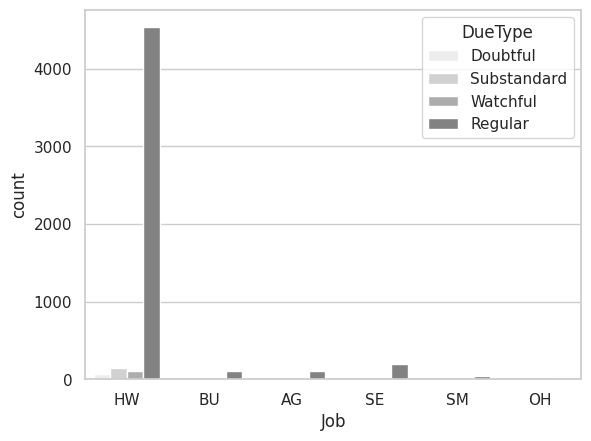

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df.rename(columns={'Self_Employed': 'Job'})

# Assuming df is your DataFrame and "Activity" and "Risk_Level" are your columns of interest
cross_tab = pd.crosstab(df['Job'], df['DueType'])

print(cross_tab)

# To create a bar plot
sns.countplot(x='Job', hue='DueType', data=df)
plt.show()


DueType   Doubtful  Regular  Substandard  Watchful
LoanTerm                                          
1               44     2396           96        57
2               13     1145           28        26
3               11      504           26         8
4                5      327           12         7
5                1      220            2         5
6                1      121            2         1
7                3       66            2         0
8                0       63            1         0
9                1       42            1         1
10               0       31            1         1
11               0       28            0         0
12               0       18            0         0
13               0       10            0         1
14               0       14            0         0
15               0        8            0         0
16               0        3            0         0
17               0        3            0         0
18               0        6    

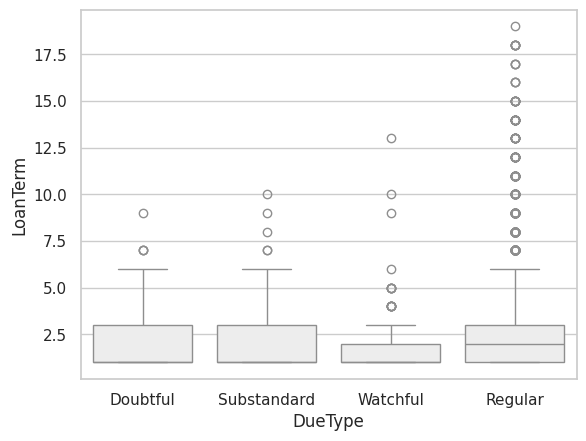

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "LoanTerm" and "DueType" are your columns of interest
cross_tab = pd.crosstab(df['LoanTerm'], df['DueType'])

print(cross_tab)

# To create a box plot
sns.boxplot(x='DueType', y='LoanTerm', data=df)
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df[['LoanTerm']], df['DueTypeO'], test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       993
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        17

    accuracy                           0.93      1073
   macro avg       0.23      0.25      0.24      1073
weighted avg       0.86      0.93      0.89      1073



/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming df is your DataFrame, "LoanTerm" is your feature, and "DueType" is your target



# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df[['LoanTerm']], df['DueTypeO'], test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.30      0.45       993
           1       0.00      0.00      0.00        22
           2       0.03      0.17      0.05        41
           3       0.02      0.53      0.03        17

    accuracy                           0.29      1073
   macro avg       0.25      0.25      0.13      1073
weighted avg       0.87      0.29      0.42      1073



/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fks1/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
